In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mclr
from tensorflow.keras import layers
from tensorflow.keras import models


2023-10-06 12:55:03.702467: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
def genData(size=500):
    data = np.random.rand(size, 2)*2 - 1
    label = np.zeros([size, 1])
    for i, p in enumerate(data):
        if (p[0]+0.2)**2 + (0.6*p[1])**2 >= 0.25:
            label[i] = 0.
        else:
            label[i] = 1.
    div = round(size*0.8)
    train_data = data[:div, :]
    test_data = data[div:, :]
    train_label = label[:div, :]
    test_label = label[div:, :]
    return (train_data, train_label), (test_data, test_label)

def drawResults(data, label, prediction):
    p_label = np.array([round(x[0]) for x in prediction])
    plt.scatter(data[:, 0], data[:, 1], s=30, c=label[:, 0], cmap=mclr.ListedColormap(['red', 'blue']))
    plt.scatter(data[:, 0], data[:, 1], s=10, c=p_label, cmap=mclr.ListedColormap(['red', 'blue']))
    plt.grid()
    plt.show()

In [8]:
(train_data, train_label), (test_data, test_label) = genData()
train_label

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],

In [31]:
H = models.Sequential()
H.add(layers.Dense(15, activation='relu', name='fc1', input_shape=(2,)))
H.add(layers.Dense(1, activation='sigmoid', name='fc2'))
H.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
H.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 15)                45        
                                                                 
 fc2 (Dense)                 (None, 1)                 16        
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
H.fit(train_data, train_label, epochs=57, batch_size=10, validation_split=0.1)

Epoch 1/57
36/36 [==============================] - 1s 6ms/step - loss: 0.6875 - accuracy: 0.4083 - val_loss: 0.6868 - val_accuracy: 0.4750
Epoch 2/57
36/36 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.4917 - val_loss: 0.6700 - val_accuracy: 0.5500
Epoch 3/57
36/36 [==============================] - 0s 2ms/step - loss: 0.6476 - accuracy: 0.6306 - val_loss: 0.6566 - val_accuracy: 0.6750
Epoch 4/57
36/36 [==============================] - 0s 2ms/step - loss: 0.6327 - accuracy: 0.6750 - val_loss: 0.6456 - val_accuracy: 0.6750
Epoch 5/57
36/36 [==============================] - 0s 2ms/step - loss: 0.6197 - accuracy: 0.6750 - val_loss: 0.6357 - val_accuracy: 0.6750
Epoch 6/57
36/36 [==============================] - 0s 2ms/step - loss: 0.6087 - accuracy: 0.6750 - val_loss: 0.6257 - val_accuracy: 0.6750
Epoch 7/57
36/36 [==============================] - 0s 2ms/step - loss: 0.5981 - accuracy: 0.6750 - val_loss: 0.6161 - val_accuracy: 0.6750
Epoch 8/57
36/36 [==

In [33]:
#Получение ошибки и точности в процессе обучения
loss = H.history.history['loss']
val_loss = H.history.history['val_loss']
acc = H.history.history['accuracy']
val_acc = H.history.history['val_accuracy']
epochs = range(1, len(loss) + 1)


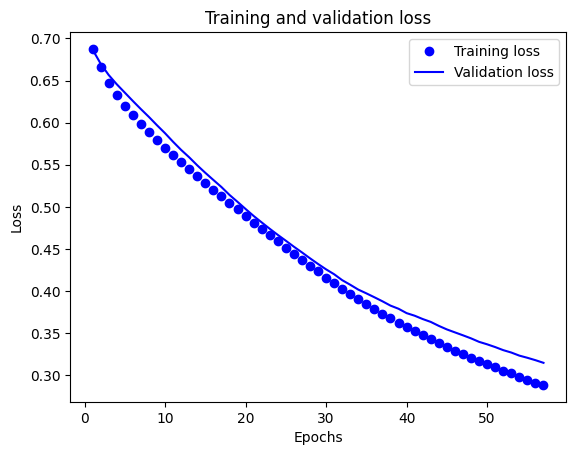

In [34]:
#Построение графика ошибки
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


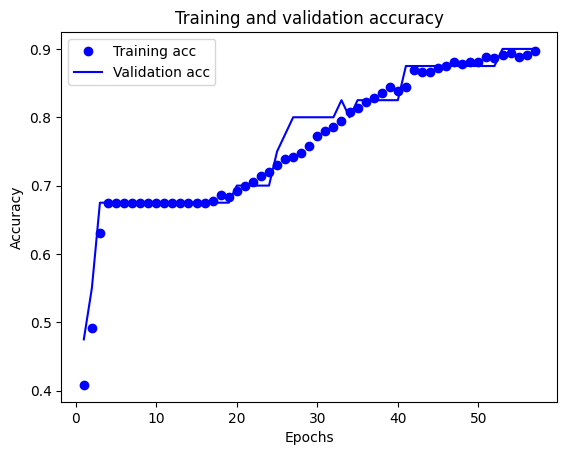

In [35]:
#Построение графика точности
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


4/4 [==============================] - 0s 2ms/step - loss: 0.2693 - accuracy: 0.9400
[0.2693289518356323, 0.9399999976158142]
16/16 [==============================] - 0s 1ms/step


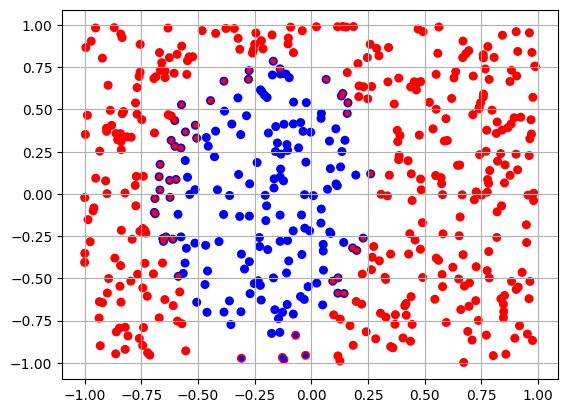

In [36]:
#Получение и вывод результатов на тестовом наборе
results = H.evaluate(test_data, test_label)
print(results)
#Вывод результатов бинарной классификации
all_data = np.vstack((train_data, test_data))
all_label = np.vstack((train_label, test_label))
pred = H.predict(all_data)
drawResults(all_data, all_label, pred)
